# Assignment 1
This assignment deals with gradient descent for training the weights of a machine learning model. We'll implement this algorithm for both a regression and classification task and in a vectorized and non-vectorized form. We then compare the performance and plot the results.


## Functions
Here we define the different functions needed for the regression and classification task:

### Sigmoid Function - σ(x)

In [36]:
import numpy as np

def sigmoid(x):
    return (1/(1 + np.exp(-x)))

### Prediction Function for Regression - hθ(x)

In [37]:
# Non-vectorized
def predict_non_vec(sample, weights, bias):
    wx = 0
    for i in range(len(sample)):
        wx += sample[i] * weights[i]
    
    return bias + wx

# Vectorized
def predict_vec(X, weights, bias):
    return bias + X@weights

def predict_vec_sample(sample, weights, bias):
    return bias + sample@weights

### Prediction Function for Classification - hθ(x)

In [38]:
# Non-vectorized
def predict_non_vec_class(sample, weights):
    # bias is weight for x0 = 1
    wx = 0
    for i in range(len(sample)):
        wx += sample[i] * weights[i]

    # apply sigmoid function
    return sigmoid(wx)
    
#Vectorized
def predict_vec_class(X, weights):
    # bias is weight for x0 = 1
    return sigmoid(X@weights)

def predict_vec_sample_class(sample, weights):
    return sigmoid(sample@weights)

### Loss Function for Regression - J(θ)

In [ ]:
# Non-vectorized
def loss_non_vec(X, y, weights, bias):
    n = len(y) # for batch GD
    
    errors = 0
    for i in range(n):
        error = predict_non_vec(X[i, :], weights, bias) - float(y[i])
        mse = error**2
        errors += mse
    
    return (1/(2*n)) * errors

# Vectorized
def loss_vec(X, y, weights, bias):
    predictions = predict_vec(X, weights, bias)
    errors = predictions - y
    mse = errors**2

    return (1/(2*len(y))) * np.sum(mse)

### Loss Function for Classification - J(θ)

In [40]:
# Non-vectorized
def loss_non_vec_class(X, y, weights):
    n = len(y) # for batch GD
    error = 0
    
    for i in range(n):
        pred = predict_non_vec_class(X[i, :], weights)
        
        error += y[i] * np.log(pred) + (1 - y[i]) * np.log(1 - pred)
    
    return -error / n

# Vectorized
def loss_vec_class(X, y, weights):
    n = len(y)

    error = y * np.log(predict_vec_class(X, weights)) + (1 - y) * np.log(1 - predict_vec_class(X, weights))

    return -np.mean(error)

## Part I - Regression: Housing price prediction

### Data Preparation
We will start by preparing our data. Let's first understand how the dataset is structured:

In [41]:
from sklearn.datasets import fetch_california_housing
import numpy as np

data = fetch_california_housing()

print(data.feature_names)

for i in range(5):
    print(list(round(float(j), 3) for j in list(data.data[i])))
    print(data.target[i])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
[8.325, 41.0, 6.984, 1.024, 322.0, 2.556, 37.88, -122.23]
4.526
[8.301, 21.0, 6.238, 0.972, 2401.0, 2.11, 37.86, -122.22]
3.585
[7.257, 52.0, 8.288, 1.073, 496.0, 2.802, 37.85, -122.24]
3.521
[5.643, 52.0, 5.817, 1.073, 558.0, 2.548, 37.85, -122.25]
3.413
[3.846, 52.0, 6.282, 1.081, 565.0, 2.181, 37.85, -122.25]
3.422


Now we will normalize the features to zero mean and unit variance

In [42]:
X_raw = data.data # get features
y_raw = data.target # get target values

mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)

X_norm = (X_raw - mean) / std # center values around 0 and scale values down

And shuffle the data

In [43]:
num_samples = X_norm.shape[0] # get number of samples in X

np.random.seed(101) # set random seed for reproducability
permutation = np.random.permutation(num_samples) # get array of integers up to number of samples in X in random order for shuffling

X_shuf = X_norm[permutation] # reordering using np indexing
y_shuf = y_raw[permutation] # reordering using np indexing

Before splitting it into test, train and validation sets

In [44]:
train_end = int(0.7 * num_samples)
test_end = train_end + int(0.15 * num_samples)

X_train = X_shuf[:train_end]
y_train = y_shuf[:train_end]

X_test = X_shuf[train_end:test_end]
y_test = y_shuf[train_end:test_end]

X_val = X_shuf[test_end:]
y_val = y_shuf[test_end:]

### Gradient Descent
Here we initialize weights and bias for training:

In [45]:
# Initialize random weights and bias between -1 and 1 for the vectorized and non-vectorized approaches 
num_features = X_train.shape[1]

np.random.seed(101)

v_weights = np.random.uniform(-1, 1, num_features)
v_bias = np.random.uniform(-1, 1)

nv_weights = list(float(w) for w in v_weights)
nv_bias = float(v_bias)

#### Non-Vectorized Gradient Descent

In [46]:
# Hyperparameters
epoch_number = 1000
learning_rate = 0.01 # Seems high, but converges much faster with much fewer steps needed
n = len(y_train) # batch GD

loss_history_non_vec = [] # for comparing results later

# Gradient Descent algorithm
def gradient_descent_non_vec(X, y):
    global nv_weights
    global nv_bias
    
    # Initialize the gradients for weights and bias
    gradient_w = [0] * num_features
    gradient_b = 0

    # Calculate the gradients
    for i in range(n):
        prediction = predict_non_vec(X[i, :], nv_weights, nv_bias)
        error = prediction - y[i]

        for j in range(num_features):
            gradient_w[j] += error * X[i, :][j]
        gradient_b += error

    # Update the weights and bias
    for j in range(num_features):
        nv_weights[j] = nv_weights[j] - learning_rate * ((1/n) * gradient_w[j])
    nv_bias = nv_bias - learning_rate * ((1/n) * gradient_b)


# Training and getting info every 100 epochs
np.random.seed(101)
samples = np.random.randint(0, n, 5)

for i in range(epoch_number):
    gradient_descent_non_vec(X_train, y_train)

    # Save loss for result comparison
    loss_history_non_vec.append(loss_non_vec(X_train, y_train, nv_weights, nv_bias))

    # Track loss every 100 epochs and print sample predictions
    if i % 100 == 0:
        print(f"Loss: {loss_non_vec(X_train, y_train, nv_weights, nv_bias)}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_non_vec(X_train[samples[j]], nv_weights, nv_bias), 4)
            tv = round(y_train[samples[j]], 4)
            diff = round(tv - p, 4)
            print(f"Prediction: {p}   |   True value: {tv}   |   Difference: {diff}")
        
        print("\n-------------------")

Loss: 4.214021065167506
-------------------
Prediction: 2.6677   |   True value: 1.238   |   Difference: -1.4297
Prediction: 1.1877   |   True value: 2.935   |   Difference: 1.7473
Prediction: 1.5317   |   True value: 2.854   |   Difference: 1.3223
Prediction: -0.3861   |   True value: 1.549   |   Difference: 1.9351
Prediction: 1.0894   |   True value: 2.413   |   Difference: 1.3236

-------------------
Loss: 0.6077016800755323
-------------------
Prediction: 1.3367   |   True value: 1.238   |   Difference: -0.0987
Prediction: 3.2615   |   True value: 2.935   |   Difference: -0.3265
Prediction: 1.7363   |   True value: 2.854   |   Difference: 1.1177
Prediction: 0.6299   |   True value: 1.549   |   Difference: 0.9191
Prediction: 2.151   |   True value: 2.413   |   Difference: 0.262

-------------------
Loss: 0.3570630691800451
-------------------
Prediction: 1.3221   |   True value: 1.238   |   Difference: -0.0841
Prediction: 4.0169   |   True value: 2.935   |   Difference: -1.0819
Pred

#### Vectorized Gradient Descent

In [47]:
m = len(y_train)

loss_history_vec = []

# Gradient Descent algorithm
def gradient_descent_vec(X, y):
    global v_weights
    global v_bias

    predictions = predict_vec(X, v_weights, v_bias)
    errors = predictions - y

    gradient_w = (1/m) * X.T@errors # use X transposed
    gradient_b = (1/m) * np.sum(errors)

    v_weights = v_weights - learning_rate * gradient_w
    v_bias = v_bias - learning_rate * gradient_b


# Training and getting info every 100 epochs
np.random.seed(101)
samples = np.random.randint(0, m, 5)

for i in range(epoch_number):
    gradient_descent_vec(X_train, y_train)

    loss_history_vec.append(loss_vec(X_train, y_train, v_weights, v_bias))

    # Track loss every 100 epochs and print sample predictions
    if i % 100 == 0:
        print(f"Loss: {loss_vec(X_train, y_train, v_weights, v_bias)}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_vec_sample(X_train[samples[j]], v_weights, v_bias), 4)
            tv = round(y_train[samples[j]], 4)
            diff = round(tv - p, 4)
            print(f"Prediction: {p}   |   True value: {tv}   |   Difference: {diff}")
        
        print("\n-------------------")



Loss: 4.2140210651675085
-------------------
Prediction: 2.6677   |   True value: 1.238   |   Difference: -1.4297
Prediction: 1.1877   |   True value: 2.935   |   Difference: 1.7473
Prediction: 1.5317   |   True value: 2.854   |   Difference: 1.3223
Prediction: -0.3861   |   True value: 1.549   |   Difference: 1.9351
Prediction: 1.0894   |   True value: 2.413   |   Difference: 1.3236

-------------------
Loss: 0.6077016800755323
-------------------
Prediction: 1.3367   |   True value: 1.238   |   Difference: -0.0987
Prediction: 3.2615   |   True value: 2.935   |   Difference: -0.3265
Prediction: 1.7363   |   True value: 2.854   |   Difference: 1.1177
Prediction: 0.6299   |   True value: 1.549   |   Difference: 0.9191
Prediction: 2.151   |   True value: 2.413   |   Difference: 0.262

-------------------
Loss: 0.35706306918004416
-------------------
Prediction: 1.3221   |   True value: 1.238   |   Difference: -0.0841
Prediction: 4.0169   |   True value: 2.935   |   Difference: -1.0819
Pr

### Comparison
Let us check whether or not the vectorized and the loop-based gradient descent implementations produce the same results:

In [48]:
for i in range(0, len(loss_history_vec), 100):
    loss_non_vec = loss_history_non_vec[i]
    loss_vec = loss_history_vec[i]
    
    print(f"Loss (Non-Vectorized): {loss_non_vec}   |   Loss (Vectorized): {loss_vec}   |   Difference: {loss_non_vec - loss_vec}")

Loss (Non-Vectorized): 4.214021065167506   |   Loss (Vectorized): 4.2140210651675085   |   Difference: -2.6645352591003757e-15
Loss (Non-Vectorized): 0.6077016800755323   |   Loss (Vectorized): 0.6077016800755323   |   Difference: 0.0
Loss (Non-Vectorized): 0.3570630691800451   |   Loss (Vectorized): 0.35706306918004416   |   Difference: 9.43689570931383e-16
Loss (Non-Vectorized): 0.322653437503637   |   Loss (Vectorized): 0.3226534375036393   |   Difference: -2.275957200481571e-15
Loss (Non-Vectorized): 0.31181161519497735   |   Loss (Vectorized): 0.311811615194976   |   Difference: 1.3322676295501878e-15
Loss (Non-Vectorized): 0.30482184149949665   |   Loss (Vectorized): 0.30482184149949776   |   Difference: -1.1102230246251565e-15
Loss (Non-Vectorized): 0.2990882908115551   |   Loss (Vectorized): 0.2990882908115551   |   Difference: 0.0
Loss (Non-Vectorized): 0.29415817742771294   |   Loss (Vectorized): 0.2941581774277128   |   Difference: 1.6653345369377348e-16
Loss (Non-Vectorized

As we can see, the difference between the loss for the non-vectorized and the vectorized gradient descent is basically 0. 

Because the calculation of the loss also uses the respective prediction function (meaning we cover both prediction, loss and gradient descent) we can be pretty sure that no difference in loss means that the vectorized and loop-based versions produce the same results (also manually confirmable by comparing the prediction samples above).

Let us now compare the efficiency of the two training algorithms:

In [49]:
from time import time

test_epoch_number = 100
test_times = 10

# Non-Vectorized
dur_nv = 0
for _ in range(test_times):
    start_time = time()
    for _ in range(epoch_number):
        gradient_descent_non_vec(X_train, y_train)
    dur_nv += time() - start_time

print(f"Average non-vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_nv/test_times, 4)}")

# Vectorized
dur_v = 0
for _ in range(test_times):
    start_time = time()
    for i in range(epoch_number):
        gradient_descent_vec(X_train, y_train)
    dur_v += time() - start_time

print(f"Average vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_v/test_times, 4)}")

print(f"The vectorized approach is around {round(dur_nv / dur_v)} times faster than the non-vectorized one.")

Average non-vectorized gradient descent duration for 100 epochs (in seconds): 75.9651
Average vectorized gradient descent duration for 100 epochs (in seconds): 0.1051
The vectorized approach is around 723 times faster than the non-vectorized one.


### Plotting and Evaluation
We will now plot our results using matplotlib. Let's start by plotting the traing loss vs. the number of epochs:

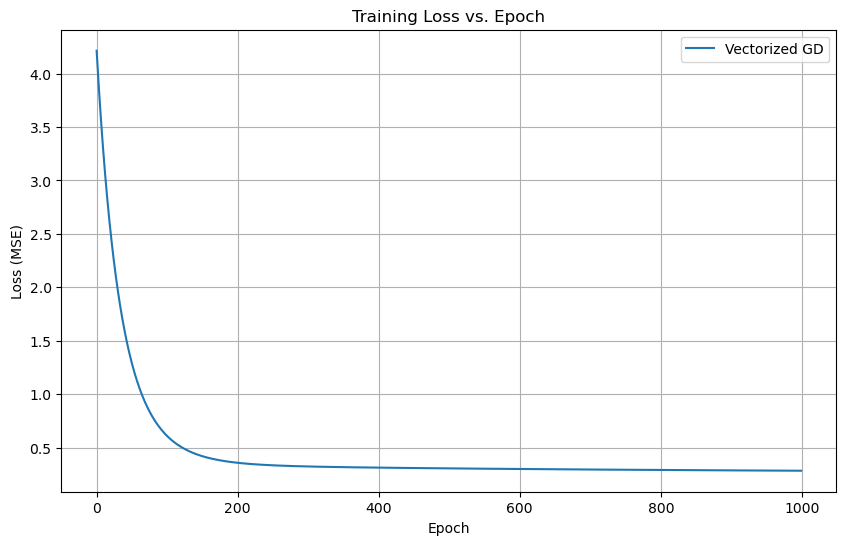

In [50]:
from matplotlib import pyplot as plt

x = list(range(epoch_number))
y_v = loss_history_vec

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

Now we will plot the predicted values vs the actual values for our validation and test sets:

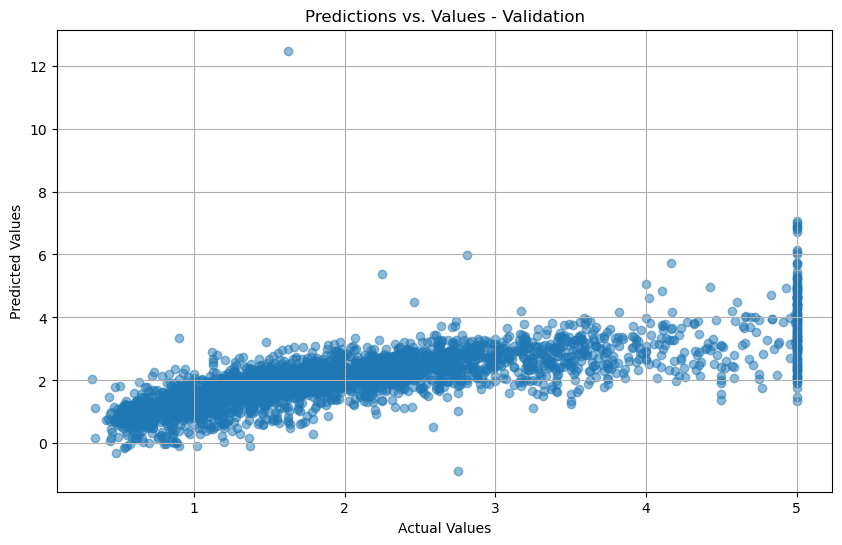

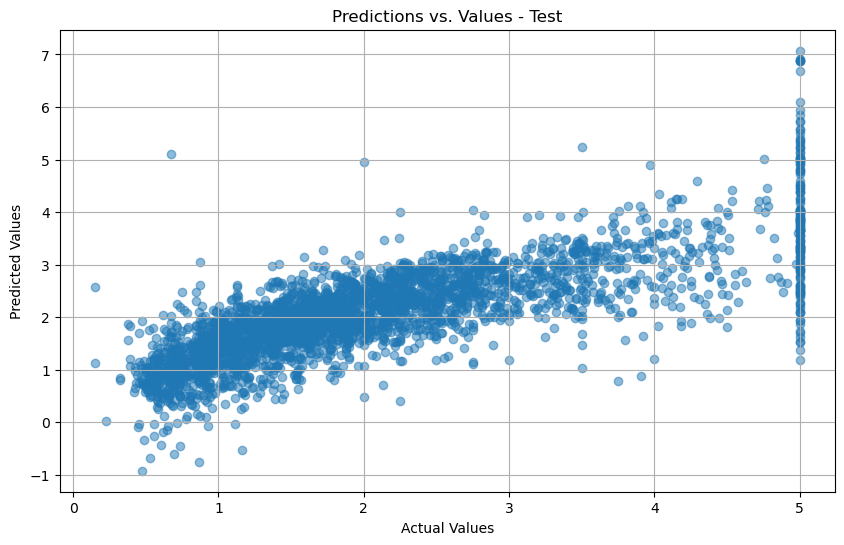

In [51]:
# Get predictions
val_predictions = predict_vec(X_val, v_weights, v_bias)
test_predictions = predict_vec(X_test, v_weights, v_bias)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions, alpha=0.5)
plt.title("Predictions vs. Values - Validation")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, alpha=0.5)
plt.title("Predictions vs. Values - Test")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.grid()

Lastly, let's calculate the MSE for our validation and test sets and compare it between our non-vectorized and our vectorized approach

In [52]:
# Function for mse
def mse_v(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Get predictions for non-vectorized approach
y_val_pred = []
for i in range(len(y_val)):
    y_val_pred.append(predict_non_vec(X_val[i, :], nv_weights, nv_bias))

y_test_pred = []
for i in range(len(y_test)):
    y_test_pred.append(predict_non_vec(X_test[i, :], nv_weights, nv_bias))

# Calculate mse
nv_mse_val = mse_v(y_val, y_val_pred)
nv_mse_test = mse_v(y_test, y_test_pred)

v_mse_val = mse_v(y_val, val_predictions)
v_mse_test = mse_v(y_test, test_predictions)

# Compare mse
print(f"Validation MSE (Non-Vectorized GD): {round(nv_mse_val, 4)}")
print(f"Validation MSE (Vectorized GD): {round(v_mse_val, 4)}")
print(f"Difference: {nv_mse_val - v_mse_val}")
print("-------------------------------------")
print(f"Test MSE (Non-Vectorized GD): {round(nv_mse_test, 4)}")
print(f"Test MSE (Vectorized GD): {round(v_mse_test, 4)}")
print(f"Difference: {nv_mse_test - v_mse_test}")

Validation MSE (Non-Vectorized GD): 0.552
Validation MSE (Vectorized GD): 0.552
Difference: 0.0
-------------------------------------
Test MSE (Non-Vectorized GD): 0.5271
Test MSE (Vectorized GD): 0.5271
Difference: 0.0


## Part II - Classification: Income Classification

### Data Preparation
The data is imported via genfromtxt from the numpy library and stored in a record array. Printing the number of entries returns 48842, which is the correct number specified on the [website of the dataset](https://archive.ics.uci.edu/dataset/2/adult).
For that we merged the two files adult.data and adult.test together into a single adult.csv file so we can decide our own split between test and training set.

In [53]:
import numpy as np
from numpy import genfromtxt

#import from csv to a numpy array of type string
dataset = genfromtxt('adult.csv', delimiter=',', dtype=str, encoding=None)

#print the length of the array for validation
print(len(dataset))

#print the first five entries of the dataset as an overview
for i in range(5):
    print(dataset[i])

48842
['39' ' State-gov' ' 77516' ' Bachelors' ' 13' ' Never-married'
 ' Adm-clerical' ' Not-in-family' ' White' ' Male' ' 2174' ' 0' ' 40'
 ' United-States' ' <=50K']
['50' ' Self-emp-not-inc' ' 83311' ' Bachelors' ' 13'
 ' Married-civ-spouse' ' Exec-managerial' ' Husband' ' White' ' Male' ' 0'
 ' 0' ' 13' ' United-States' ' <=50K']
['38' ' Private' ' 215646' ' HS-grad' ' 9' ' Divorced'
 ' Handlers-cleaners' ' Not-in-family' ' White' ' Male' ' 0' ' 0' ' 40'
 ' United-States' ' <=50K']
['53' ' Private' ' 234721' ' 11th' ' 7' ' Married-civ-spouse'
 ' Handlers-cleaners' ' Husband' ' Black' ' Male' ' 0' ' 0' ' 40'
 ' United-States' ' <=50K']
['28' ' Private' ' 338409' ' Bachelors' ' 13' ' Married-civ-spouse'
 ' Prof-specialty' ' Wife' ' Black' ' Female' ' 0' ' 0' ' 40' ' Cuba'
 ' <=50K']


### Encoding

The algorithm can only work with numerical data so we have to convert categorical data into a numerical format.
As workclass, education, marital-status, occupation, relationship, race, sex, native-country and income are all categorical we use label encoding. We've decided against one-hot encoding as there is no simple way to store vectors as a single entry in a numpy record array.

We then normalize the data so that there is zero mean and unit variance.

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# remove dot at the end of target values
for i in range(dataset.shape[0]):
    dataset[i, 14] = dataset[i, 14].replace(".", "") 
    
# indexes of columns that are categorical and need to be converted
categorical_columns = [1, 3, 5, 6, 7, 8, 9, 13, 14]

for i in categorical_columns:
    data = set(dataset[:, i])
    dataset[:, i] = le.fit_transform(dataset[:, i])

# convert whole numpy array to datatype integer
num_dataset = dataset.astype(np.float64)

# splitting into feature and target values
X_raw = num_dataset[:, :14]
y_raw = num_dataset[:, 14]

# calculating mean and standard deviation
mean = np.mean(X_raw, axis=0)
std = np.std(X_raw, axis=0)

# center values around 0 and scale values down
X_norm = (X_raw - mean) / std

### Adding bias term
For easier handling we add a bias-term of x0 = 1 to the X_raw as an additional feature:

In [55]:
bias = np.ones((X_norm.shape[0], 1))
X_norm_bias = np.hstack((bias, X_norm))

### Shuffle and split
For our final step in preparation we shuffle the dataset and then split it into a training, test and validation set

In [56]:
num_samples = X_norm_bias.shape[0]

# set random seed for reproducability
np.random.seed(42)

# get array of integers up to number of samples in X in random order for shuffling
permutation = np.random.permutation(num_samples)

 # reordering using np indexing
X_shuf = X_norm_bias[permutation]
y_shuf = y_raw[permutation]

# calculate the end of different sets
train_end = int(0.7 * num_samples)
test_end = train_end + int(0.15 * num_samples)

# create training set
X_train = X_shuf[:train_end]
y_train = y_shuf[:train_end]

# create test set
X_test = X_shuf[train_end:test_end]
y_test = y_shuf[train_end:test_end]

# create validation set
X_val = X_shuf[test_end:]
y_val = y_shuf[test_end:]

### Output generation
This function outputs the respective class for a given prediction

In [57]:
def pred_to_class(prediction):
    if prediction < 0.5:
        return '<=50K'
    else:
        return '>50K'

### Gradient Descent
Here we initialize weights for training:

In [58]:
# Initialize random weights between -1 and 1 for the vectorized and non-vectorized approaches 
num_features = X_train.shape[1]

np.random.seed(42)

v_weights = np.random.uniform(-1, 1, num_features)

nv_weights = list(float(w) for w in v_weights)

### Non-Vectorized Gradient Descent

In [59]:
# Hyperparameters
epoch_number = 1000
learning_rate = 0.01 # Seems high, but converges much faster with much fewer steps needed
n = len(y_train) # batch GD

loss_history_non_vec = [] # for comparing results later
accuracy_history_non_vec = []

# Gradient Descent algorithm
def gradient_descent_non_vec_class(X, y):
    global nv_weights

    accuracy_counter = 0
    
    # Initialize the gradients for weights
    gradient_w = [0] * num_features

    # Calculate the gradients
    for i in range(n):
        prediction = predict_non_vec_class(X[i, :], nv_weights)
        error = prediction - y[i]

        predicted_class = pred_to_class(prediction)
        actual_class = pred_to_class(y[i])
    
        if predicted_class == actual_class:
            accuracy_counter += 1

        for j in range(num_features):
            gradient_w[j] += error * X[i, :][j]
            
    # Update the weights
    for j in range(num_features):
        nv_weights[j] = nv_weights[j] - learning_rate * ((1/n) * gradient_w[j])

    accuracy_history_non_vec.append(accuracy_counter)

# Training and getting info every 100 epochs
np.random.seed(42)
samples = np.random.randint(0, n, 5)

for i in range(epoch_number):
    gradient_descent_non_vec_class(X_train, y_train)

    # Save loss for result comparison
    loss_history_non_vec.append(loss_non_vec_class(X_train, y_train, nv_weights))

    # Track loss every 100 epochs and print sample predictions
    if i % 100 == 0:
        accuracy = round(accuracy_history_non_vec[-1] / m, 4)
        
        print(f"Loss: {loss_non_vec_class(X_train, y_train, nv_weights)}, Accuracy: {accuracy}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_non_vec_class(X_train[samples[j]], nv_weights), 4)
            tv = round(y_train[samples[j]], 4)
            p_class = pred_to_class(p)
            tv_class = pred_to_class(tv)
            correct = p_class == tv_class
            diff = round(tv - p, 4)
            print(f"Prediction: {p} ({p_class}) |   True value: {tv} ({tv_class})  |   Difference: {diff}  |   Correct: {correct}")
        
        print("\n-------------------")

Loss: 1.1121525877787022, Accuracy: 1.2819
-------------------
Prediction: 0.4404 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.4404  |   Correct: True
Prediction: 0.1591 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.1591  |   Correct: True
Prediction: 0.5282 (>50K) |   True value: 0.0 (<=50K)  |   Difference: -0.5282  |   Correct: False
Prediction: 0.0496 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.0496  |   Correct: True
Prediction: 0.0069 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.0069  |   Correct: True

-------------------
Loss: 0.9028457698170884, Accuracy: 1.3879
-------------------
Prediction: 0.337 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.337  |   Correct: True
Prediction: 0.1415 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.1415  |   Correct: True
Prediction: 0.5562 (>50K) |   True value: 0.0 (<=50K)  |   Difference: -0.5562  |   Correct: False
Prediction: 0.0402 (<=50K) |   True value: 0.0 (<=50K)  |   Dif

### Vectorized Gradient Descent

In [60]:
# Hyperparameters
epoch_number = 1000
learning_rate = 0.01 # Seems high, but converges much faster with much fewer steps needed
m = len(y_train)

loss_history_vec = []
accuracy_history_vec = []
validation_accuracy_history_vec = []
recall_history_vec = []
precision_history_vec = []

# Gradient Descent algorithm
def gradient_descent_vec_class(X, y):
    global v_weights

    accuracy_counter = 0
    recall_counter = 0
    precision_counter = 0
    
    predictions = predict_vec_class(X, v_weights)
    errors = predictions - y

    for i, prediction in enumerate(predictions):
        predicted_class = pred_to_class(prediction)
        actual_class = pred_to_class(y[i])
    
        if predicted_class == actual_class:
            accuracy_counter += 1

        if predicted_class == '<=50K':
            precision_counter += 1
            
            if actual_class == '<=50K':
                recall_counter += 1

    accuracy_history_vec.append(accuracy_counter)
    recall_history_vec.append(recall_counter)
    precision_history_vec.append(precision_counter)

    gradient_w = (1/m) * X.T@errors # use X transposed
    
    v_weights = v_weights - learning_rate * gradient_w

# Gradient Descent algorithm (for validation)
def gradient_descent_vec_class_val(X, y):
    global v_weights

    accuracy_counter = 0
    
    predictions = predict_vec_class(X, v_weights)
    errors = predictions - y

    for i, prediction in enumerate(predictions):
        predicted_class = pred_to_class(prediction)
        actual_class = pred_to_class(y[i])
    
        if predicted_class == actual_class:
            accuracy_counter += 1

    validation_accuracy_history_vec.append(accuracy_counter)

# Training and getting info every 100 epochs
np.random.seed(42)
samples = np.random.randint(0, m, 5)

for i in range(epoch_number):
    gradient_descent_vec_class(X_train, y_train)
    gradient_descent_vec_class_val(X_val, y_val)

    loss_history_vec.append(loss_vec_class(X_train, y_train, v_weights))

    # Track loss every 100 epochs and print sample predictions
    if i % 100 == 0:
        accuracy = round(accuracy_history_vec[-1] / m, 4)
        
        print(f"Loss: {loss_vec_class(X_train, y_train, v_weights)}, Accuracy: {accuracy}", end="\n-------------------\n")

        for j in range(len(samples)):
            p = round(predict_vec_sample_class(X_train[samples[j]], v_weights), 4)
            tv = round(y_train[samples[j]], 4)
            p_class = pred_to_class(p)
            tv_class = pred_to_class(tv)
            correct = p_class == tv_class
            diff = round(tv - p, 4)
            print(f"Prediction: {p} ({p_class}) |   True value: {tv} ({tv_class})  |   Difference: {diff}  |   Correct: {correct}")
        
        print("\n-------------------")

Loss: 1.1121525877787024, Accuracy: 0.5417
-------------------
Prediction: 0.4404 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.4404  |   Correct: True
Prediction: 0.1591 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.1591  |   Correct: True
Prediction: 0.5282 (>50K) |   True value: 0.0 (<=50K)  |   Difference: -0.5282  |   Correct: False
Prediction: 0.0496 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.0496  |   Correct: True
Prediction: 0.0069 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.0069  |   Correct: True

-------------------
Loss: 0.9028457698170894, Accuracy: 0.5865
-------------------
Prediction: 0.337 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.337  |   Correct: True
Prediction: 0.1415 (<=50K) |   True value: 0.0 (<=50K)  |   Difference: -0.1415  |   Correct: True
Prediction: 0.5562 (>50K) |   True value: 0.0 (<=50K)  |   Difference: -0.5562  |   Correct: False
Prediction: 0.0402 (<=50K) |   True value: 0.0 (<=50K)  |   Dif

### Comparison
Let us check whether or not the vectorized and the loop-based gradient descent implementations produce the same results:

In [61]:
for i in range(0, len(loss_history_vec), 100):
    loss_non_vec = loss_history_non_vec[i]
    loss_vec = loss_history_vec[i]
    
    print(f"Loss (Non-Vectorized): {loss_non_vec}   |   Loss (Vectorized): {loss_vec}   |   Difference: {loss_non_vec - loss_vec}")

Loss (Non-Vectorized): 1.1121525877787022   |   Loss (Vectorized): 1.1121525877787024   |   Difference: -2.220446049250313e-16
Loss (Non-Vectorized): 0.9028457698170884   |   Loss (Vectorized): 0.9028457698170894   |   Difference: -9.992007221626409e-16
Loss (Non-Vectorized): 0.7502329479355164   |   Loss (Vectorized): 0.7502329479355184   |   Difference: -1.9984014443252818e-15
Loss (Non-Vectorized): 0.6426537469974906   |   Loss (Vectorized): 0.6426537469974906   |   Difference: 0.0
Loss (Non-Vectorized): 0.5682774277299156   |   Loss (Vectorized): 0.5682774277299137   |   Difference: 1.887379141862766e-15
Loss (Non-Vectorized): 0.5171906704796249   |   Loss (Vectorized): 0.5171906704796246   |   Difference: 2.220446049250313e-16
Loss (Non-Vectorized): 0.48197199254673095   |   Loss (Vectorized): 0.4819719925467294   |   Difference: 1.5543122344752192e-15
Loss (Non-Vectorized): 0.45742486080235284   |   Loss (Vectorized): 0.45742486080235034   |   Difference: 2.4980018054066022e-15
L

Just as for the regression part, the difference in loss between vectorized and non-vectorized is basically zero, confirming that they function identically as their respective functions for prediction and loss also use the same math behind them.

Now again we compare the time efficiency for the two versions:

In [78]:
from time import time

test_epoch_number = 100
test_times = 5

# Non-Vectorized
dur_nv = 0
for j in range(test_times):
    start_time = time()
    for i in range(test_epoch_number):
        gradient_descent_non_vec_class(X_train, y_train)
    dur_nv += time() - start_time

print(f"Average non-vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_nv/test_times, 4)}")

# Vectorized
dur_v = 0
for j in range(test_times):
    start_time = time()
    for i in range(test_epoch_number):
        gradient_descent_vec_class_val(X_train, y_train)
    dur_v += time() - start_time

print(f"Average vectorized gradient descent duration for 100 epochs (in seconds): {round(dur_v/test_times, 4)}")

print(f"The vectorized approach is around {round(dur_nv / dur_v)} times faster than the non-vectorized one.")

Average non-vectorized gradient descent duration for 100 epochs (in seconds): 36.0933
Average vectorized gradient descent duration for 100 epochs (in seconds): 1.1662
The vectorized approach is around 31 times faster than the non-vectorized one.


As we can clearly see, the vectorized version is much faster than the non-verctorized one because it avoids explicit loops and instead performs computations using efficient vector/matrix multiplication. (Some parts of the vectorized approach are unoptimized. Performance should be even better if that was changed.)

### Plotting
We will now plot our results using matplotlib. Let's start by plotting the traing loss vs. the number of epochs:

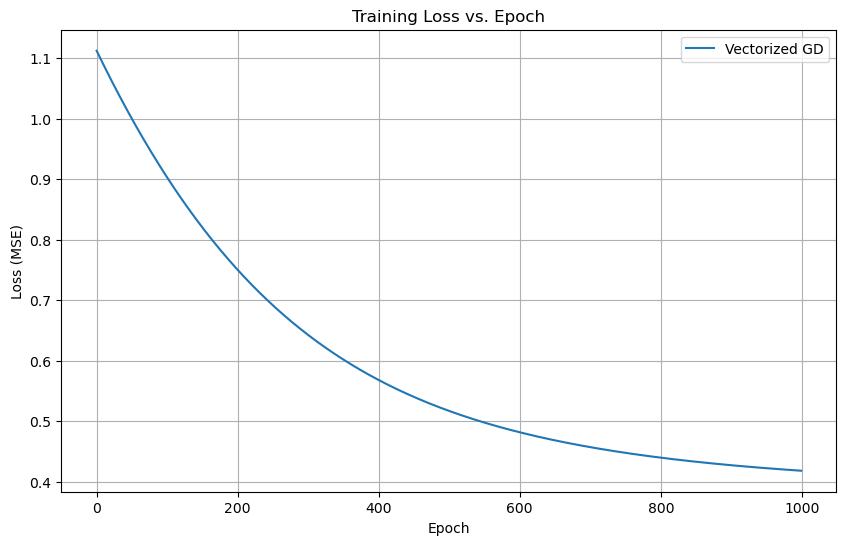

In [66]:
from matplotlib import pyplot as plt

x = list(range(epoch_number))
y_v = loss_history_vec

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss vs. Epoch")
plt.legend()
plt.grid()
plt.show()

We can observe that the training loss steadily declines starting at 1.1. After 1000 epochs it approximates 0.4

Lets also look at how the accuracy changes throughout the epochs for both the training and validation set:

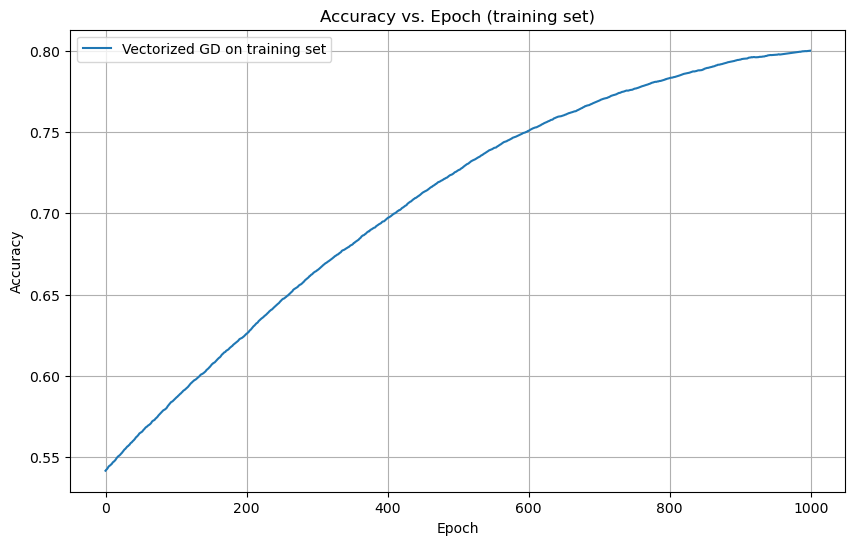

In [67]:
from matplotlib import pyplot as plt

percentages = [x / m for x in accuracy_history_vec]

x = list(range(epoch_number))
y_v = percentages

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD on training set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch (training set)")
plt.legend()
plt.grid()
plt.show()

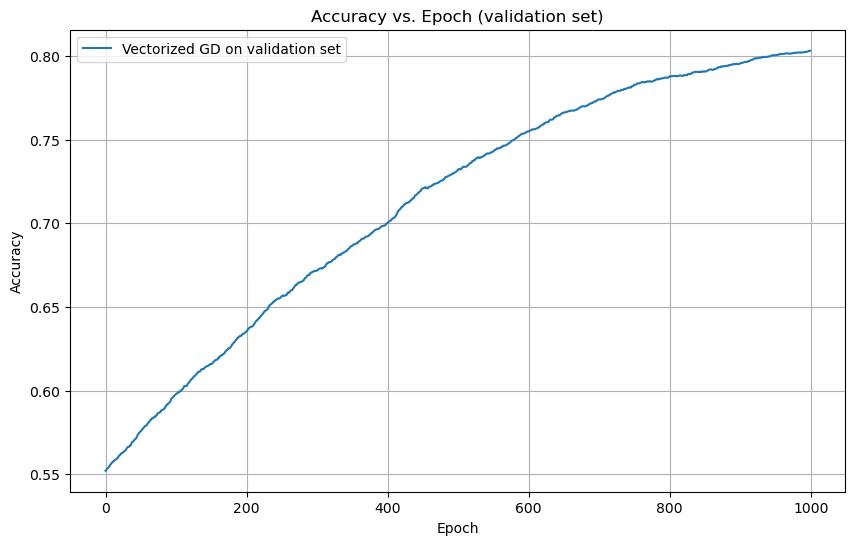

In [68]:
from matplotlib import pyplot as plt

size = len(y_val)

percentages = [x / size for x in validation_accuracy_history_vec]

x = list(range(epoch_number))
y_v = percentages

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD on validation set")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch (validation set)")
plt.legend()
plt.grid()
plt.show()

As the two graphs show the accuracy throughout the epochs is really similar between the training and the evaluation set. After 1000 epochs the accuracy exceeds 0.8 for both of them. This already is a very good sign for no overfitting occuring.

### Evaluation
We furthermore want to evaluate the final model by checking the accuracy, precision, recall and F1-score on the test set. For that we first graph the precision, recall and F1-score for the training set throughout the epochs. As we can see below they all similarly increase with each epoch though the rate of change declines:

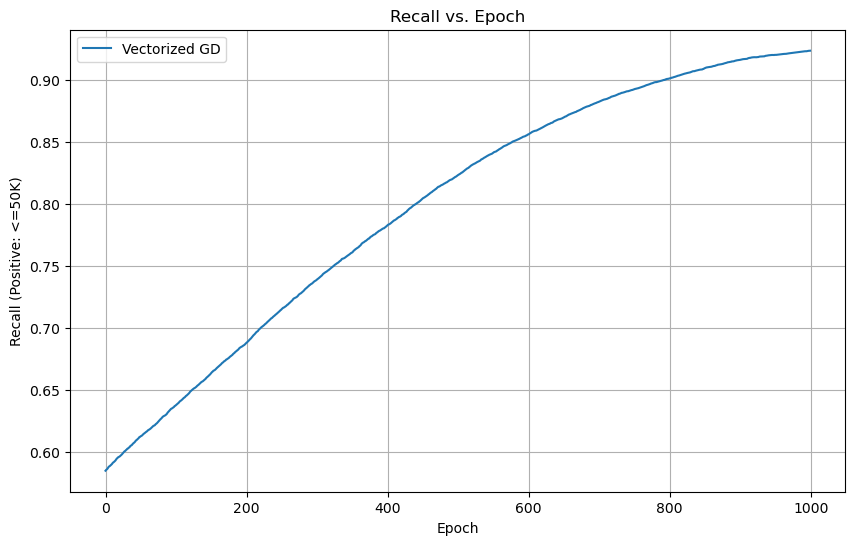

In [69]:
from matplotlib import pyplot as plt

positive_count = list(y_train).count(0.0)
recall = [x / positive_count for x in recall_history_vec]

x = list(range(epoch_number))
y_v = recall

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("Recall (Positive: <=50K)")
plt.title("Recall vs. Epoch")
plt.legend()
plt.grid()
plt.show()

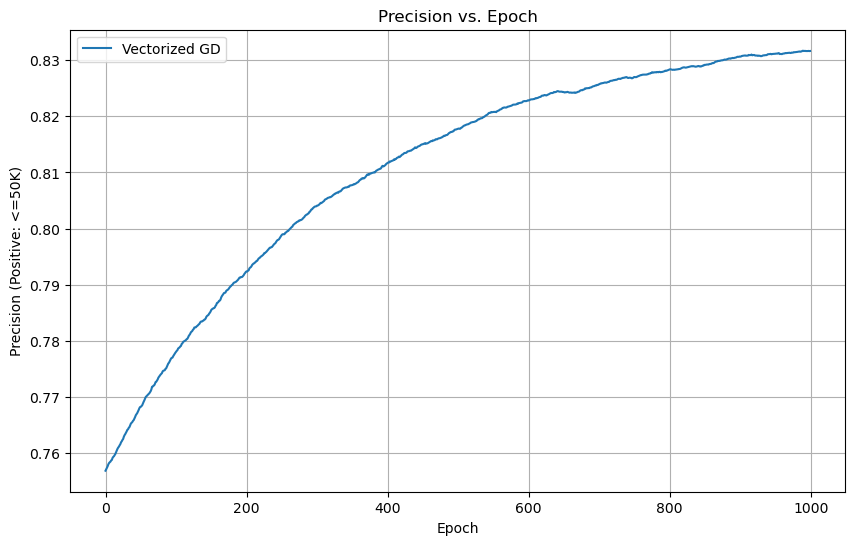

In [70]:
from matplotlib import pyplot as plt

precision = np.array(recall_history_vec) / np.array(precision_history_vec)

x = list(range(epoch_number))
y_v = precision

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("Precision (Positive: <=50K)")
plt.title("Precision vs. Epoch")
plt.legend()
plt.grid()
plt.show()

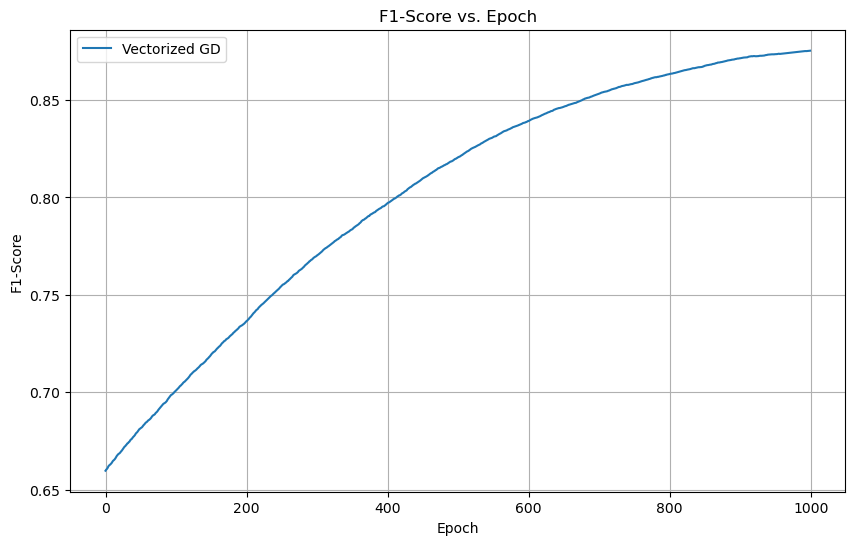

In [71]:
from matplotlib import pyplot as plt

positive_count = list(y_train).count(0.0)
recall = np.array([x / positive_count for x in recall_history_vec])
precision = np.array(recall_history_vec) / np.array(precision_history_vec)

f1 = 2 * ((precision * recall) / (precision + recall))

x = list(range(epoch_number))
y_v = f1

plt.figure(figsize=(10, 6))
plt.plot(x, y_v, label="Vectorized GD")
plt.xlabel("Epoch")
plt.ylabel("F1-Score")
plt.title("F1-Score vs. Epoch")
plt.legend()
plt.grid()
plt.show()

After 1000 epochs we get the following values for the different measurements with the training set:

In [72]:
precision = recall_history_vec[-1] / precision_history_vec[-1]
recall = recall_history_vec[-1] / positive_count

print(f"Accuracy: {round(accuracy_history_vec[-1] / m, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"F1-Score: {round(2 * ((precision * recall) / (precision + recall)), 4)}")

Accuracy: 0.8001
Recall: 0.9239
Precision: 0.8316
F1-Score: 0.8753


Now we calculate the measurements for the test set:

In [73]:
size = len(y_test)
test_predictions = predict_vec_class(X_test, v_weights)

accuracy_counter = 0
precision_counter = 0
recall_counter = 0

for i, prediction in enumerate(test_predictions):
        predicted_class = pred_to_class(prediction)
        actual_class = pred_to_class(y_test[i])
    
        if predicted_class == actual_class:
            accuracy_counter += 1

        if predicted_class == '<=50K':
            precision_counter += 1
            
            if actual_class == '<=50K':
                recall_counter += 1
        
accuracy = accuracy_counter / size
positive_count = list(y_test).count(0.0)
recall = recall_counter / positive_count
precision = recall_counter / precision_counter
f1 = 2 * ((precision * recall) / (precision + recall))

print(f"Accuracy: {round(accuracy, 4)}")
print(f"Recall: {round(recall, 4)}")
print(f"Precision: {round(precision, 4)}")
print(f"F1-Score: {round(f1, 4)}")

Accuracy: 0.795
Recall: 0.9187
Precision: 0.8308
F1-Score: 0.8725


We can see that all measurements are just insignificantly lower for the test set than for the training set, proving that the model is a good fit even for unseen data.